In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import openpyxl

In [ ]:
DATA_PATH = "C:\\Users\\reisd\\Documents\\code\\machinelearn\\"
DATA_NAME = "airfoilselfnoise"
DATA_FILE_NAME = DATA_PATH + DATA_NAME + "\\"
header = ['frequency', 'Attack Angle', 'Chord Length', 'Free-Stream Velocity', 'Suction Side Displacement Thickness', 'Scaled Sound Pressure']
units = ['Hz', 'dg', 'm', 'm/s', 'm', 'Db']
if not os.path.isdir(DATA_FILE_NAME):
    os.makedirs(DATA_FILE_NAME)

df = pd.read_table(DATA_FILE_NAME + DATA_NAME + ".dat")
df.columns = header


In [56]:
df

,frequency,Attack Angle,Chord Length,Free-Stream Velocity,Suction Side Displacement Thickness,Scaled Sound Pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [115]:
pressure = df['Scaled Sound Pressure']
freq = df['frequency']
# freq_log10 = np.log10(freq)
# freq_ln = np.log(freq)


Text(0, 0.5, 'f [Hz]')

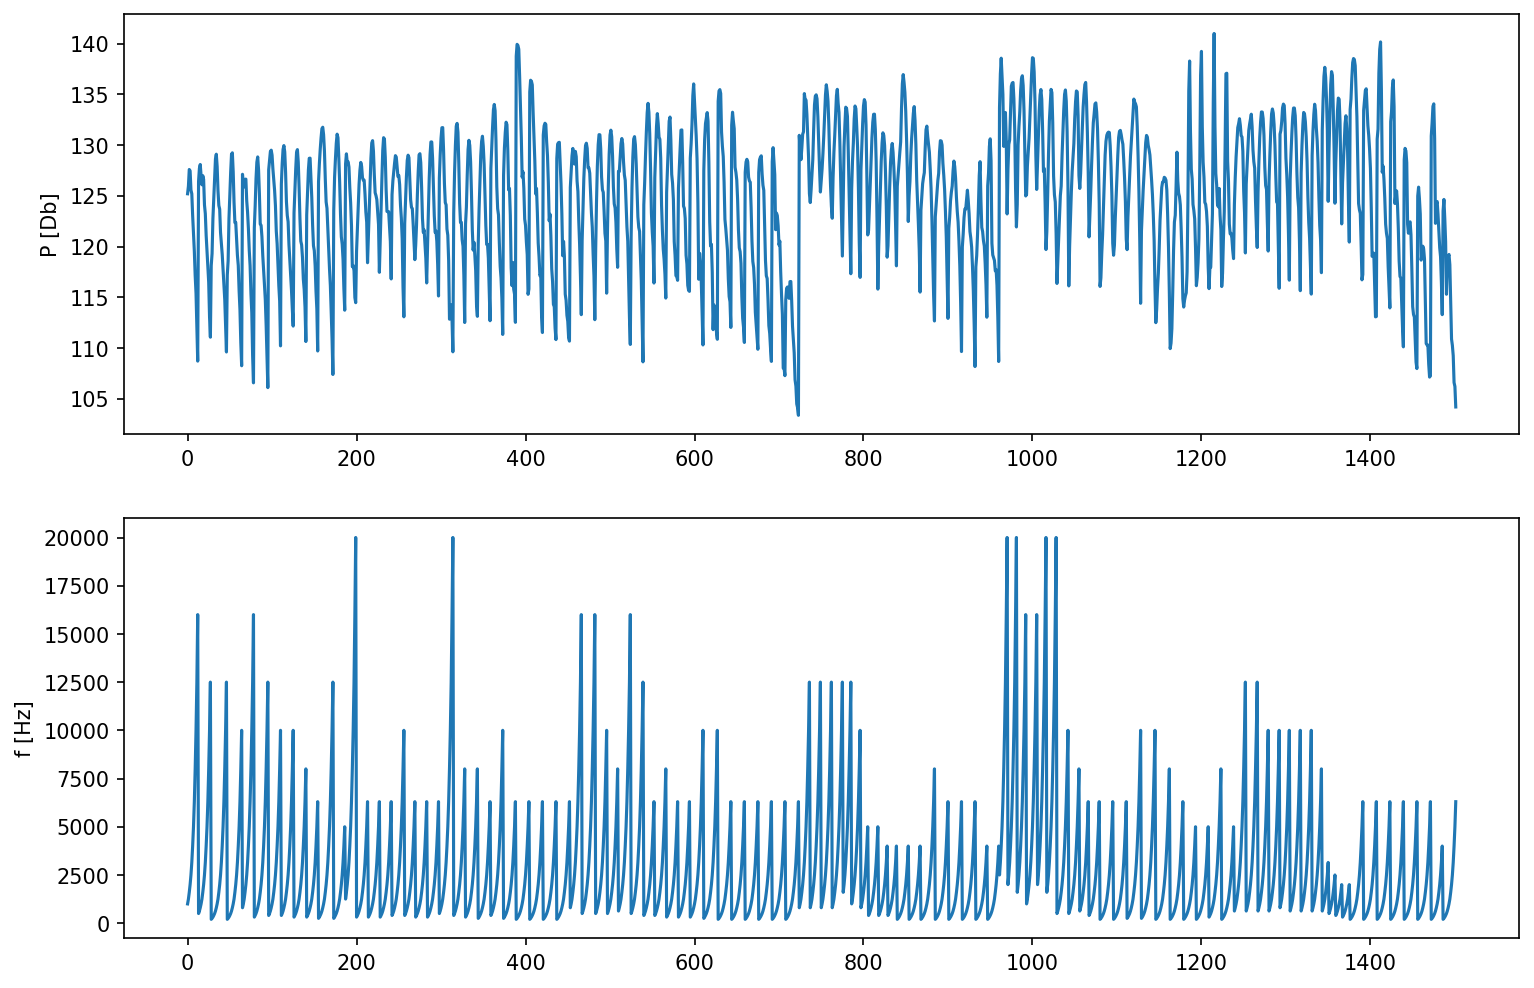

In [113]:
fig, ax = plt.subplots(2,1)
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 150
ax[0].plot(pressure)
ax[0].set_ylabel("P [Db]")
ax[1].plot(freq)
ax[1].set_ylabel("f [Hz]")


In [89]:
angle = df.iloc[:,1]
Clenght = df["Chord Length"]
velocity = df["Free-Stream Velocity"]
Displacement = df["Suction Side Displacement Thickness"]

In [128]:
freq

0       1000
1       1250
2       1600
3       2000
4       2500
        ... 
1497    2500
1498    3150
1499    4000
1500    5000
1501    6300
Name: frequency, Length: 1502, dtype: int64

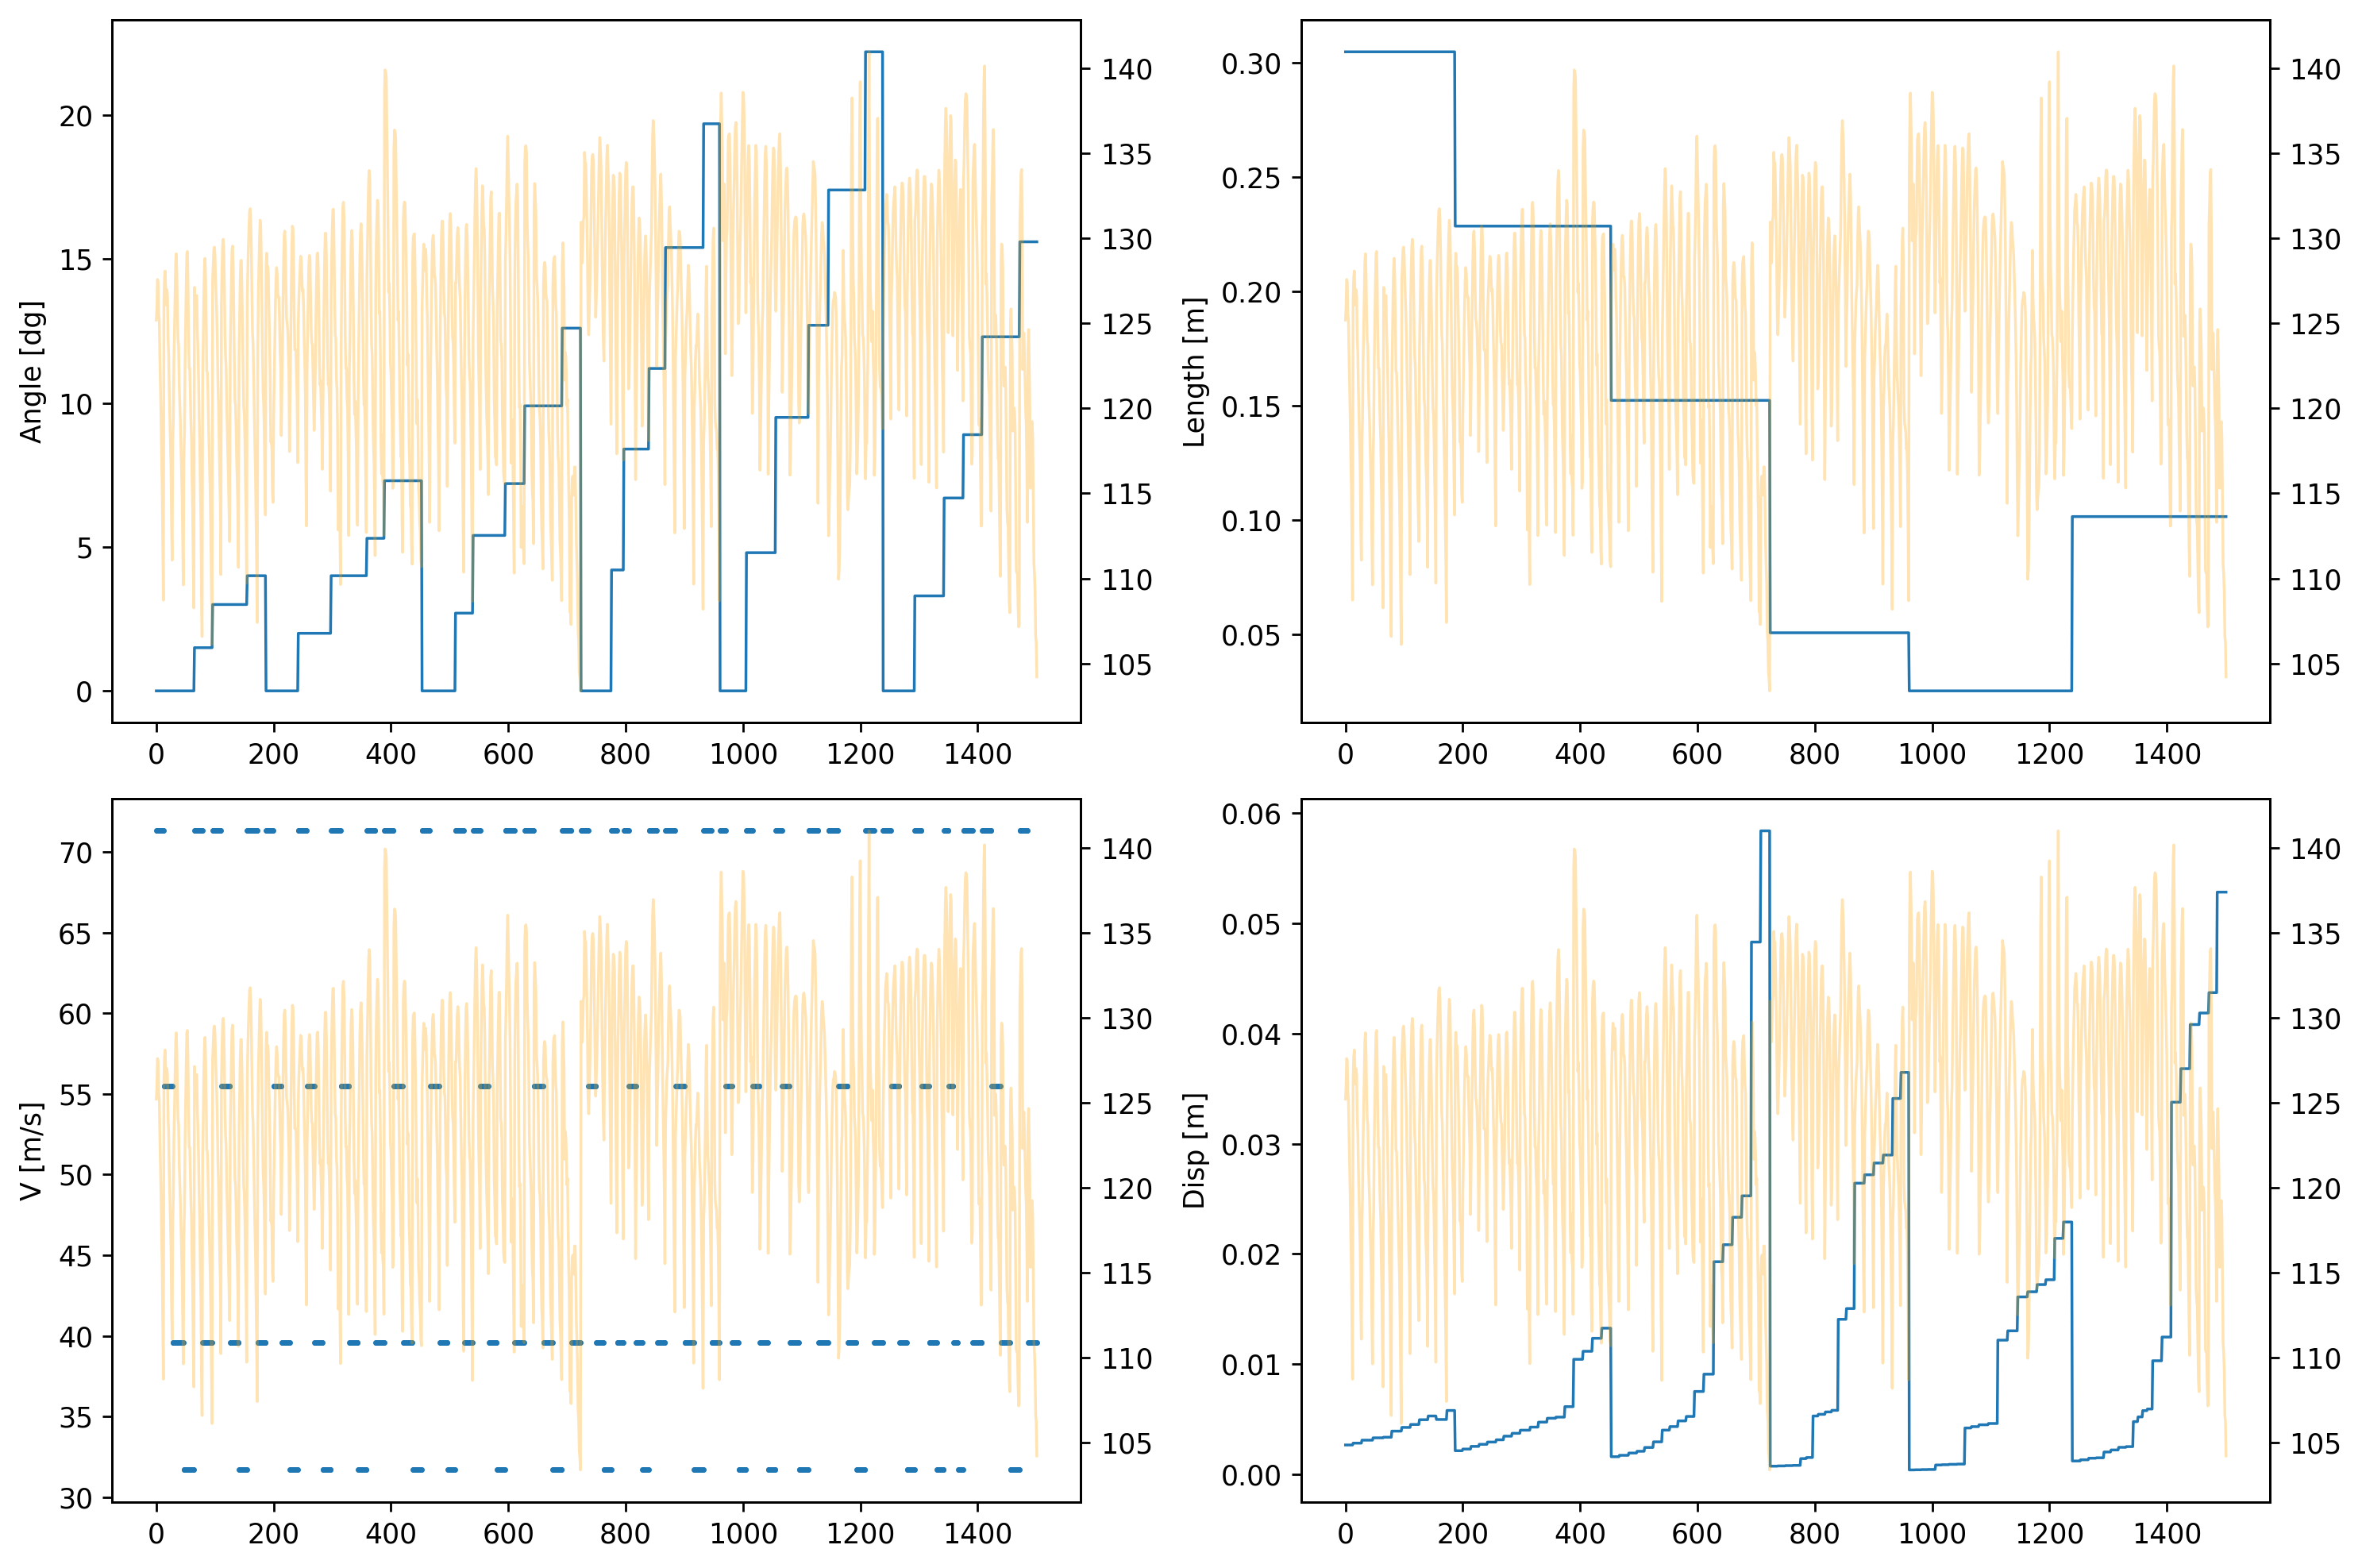

In [180]:

fig, ax = plt.subplots(2,2)

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 1

ax[0,0].plot(angle)
ax[0,0].twinx().plot(pressure, alpha = 0.3, color = 'orange')
ax[0,0].set_ylabel("Angle [dg]")

ax[0,1].plot(Clenght)
ax[0,1].twinx().plot(pressure, alpha = 0.3, color = 'orange')
ax[0,1].set_ylabel("Length [m]")

ax[1,0].scatter(velocity.index, velocity)
ax[1,0].twinx().plot(pressure, alpha = 0.3, color = 'orange')
ax[1,0].set_ylabel("V [m/s]")

ax[1,1].plot(Displacement)
ax[1,1].twinx().plot(pressure, alpha = 0.3, color = 'orange')
ax[1,1].set_ylabel("Disp [m]")

fig.tight_layout()

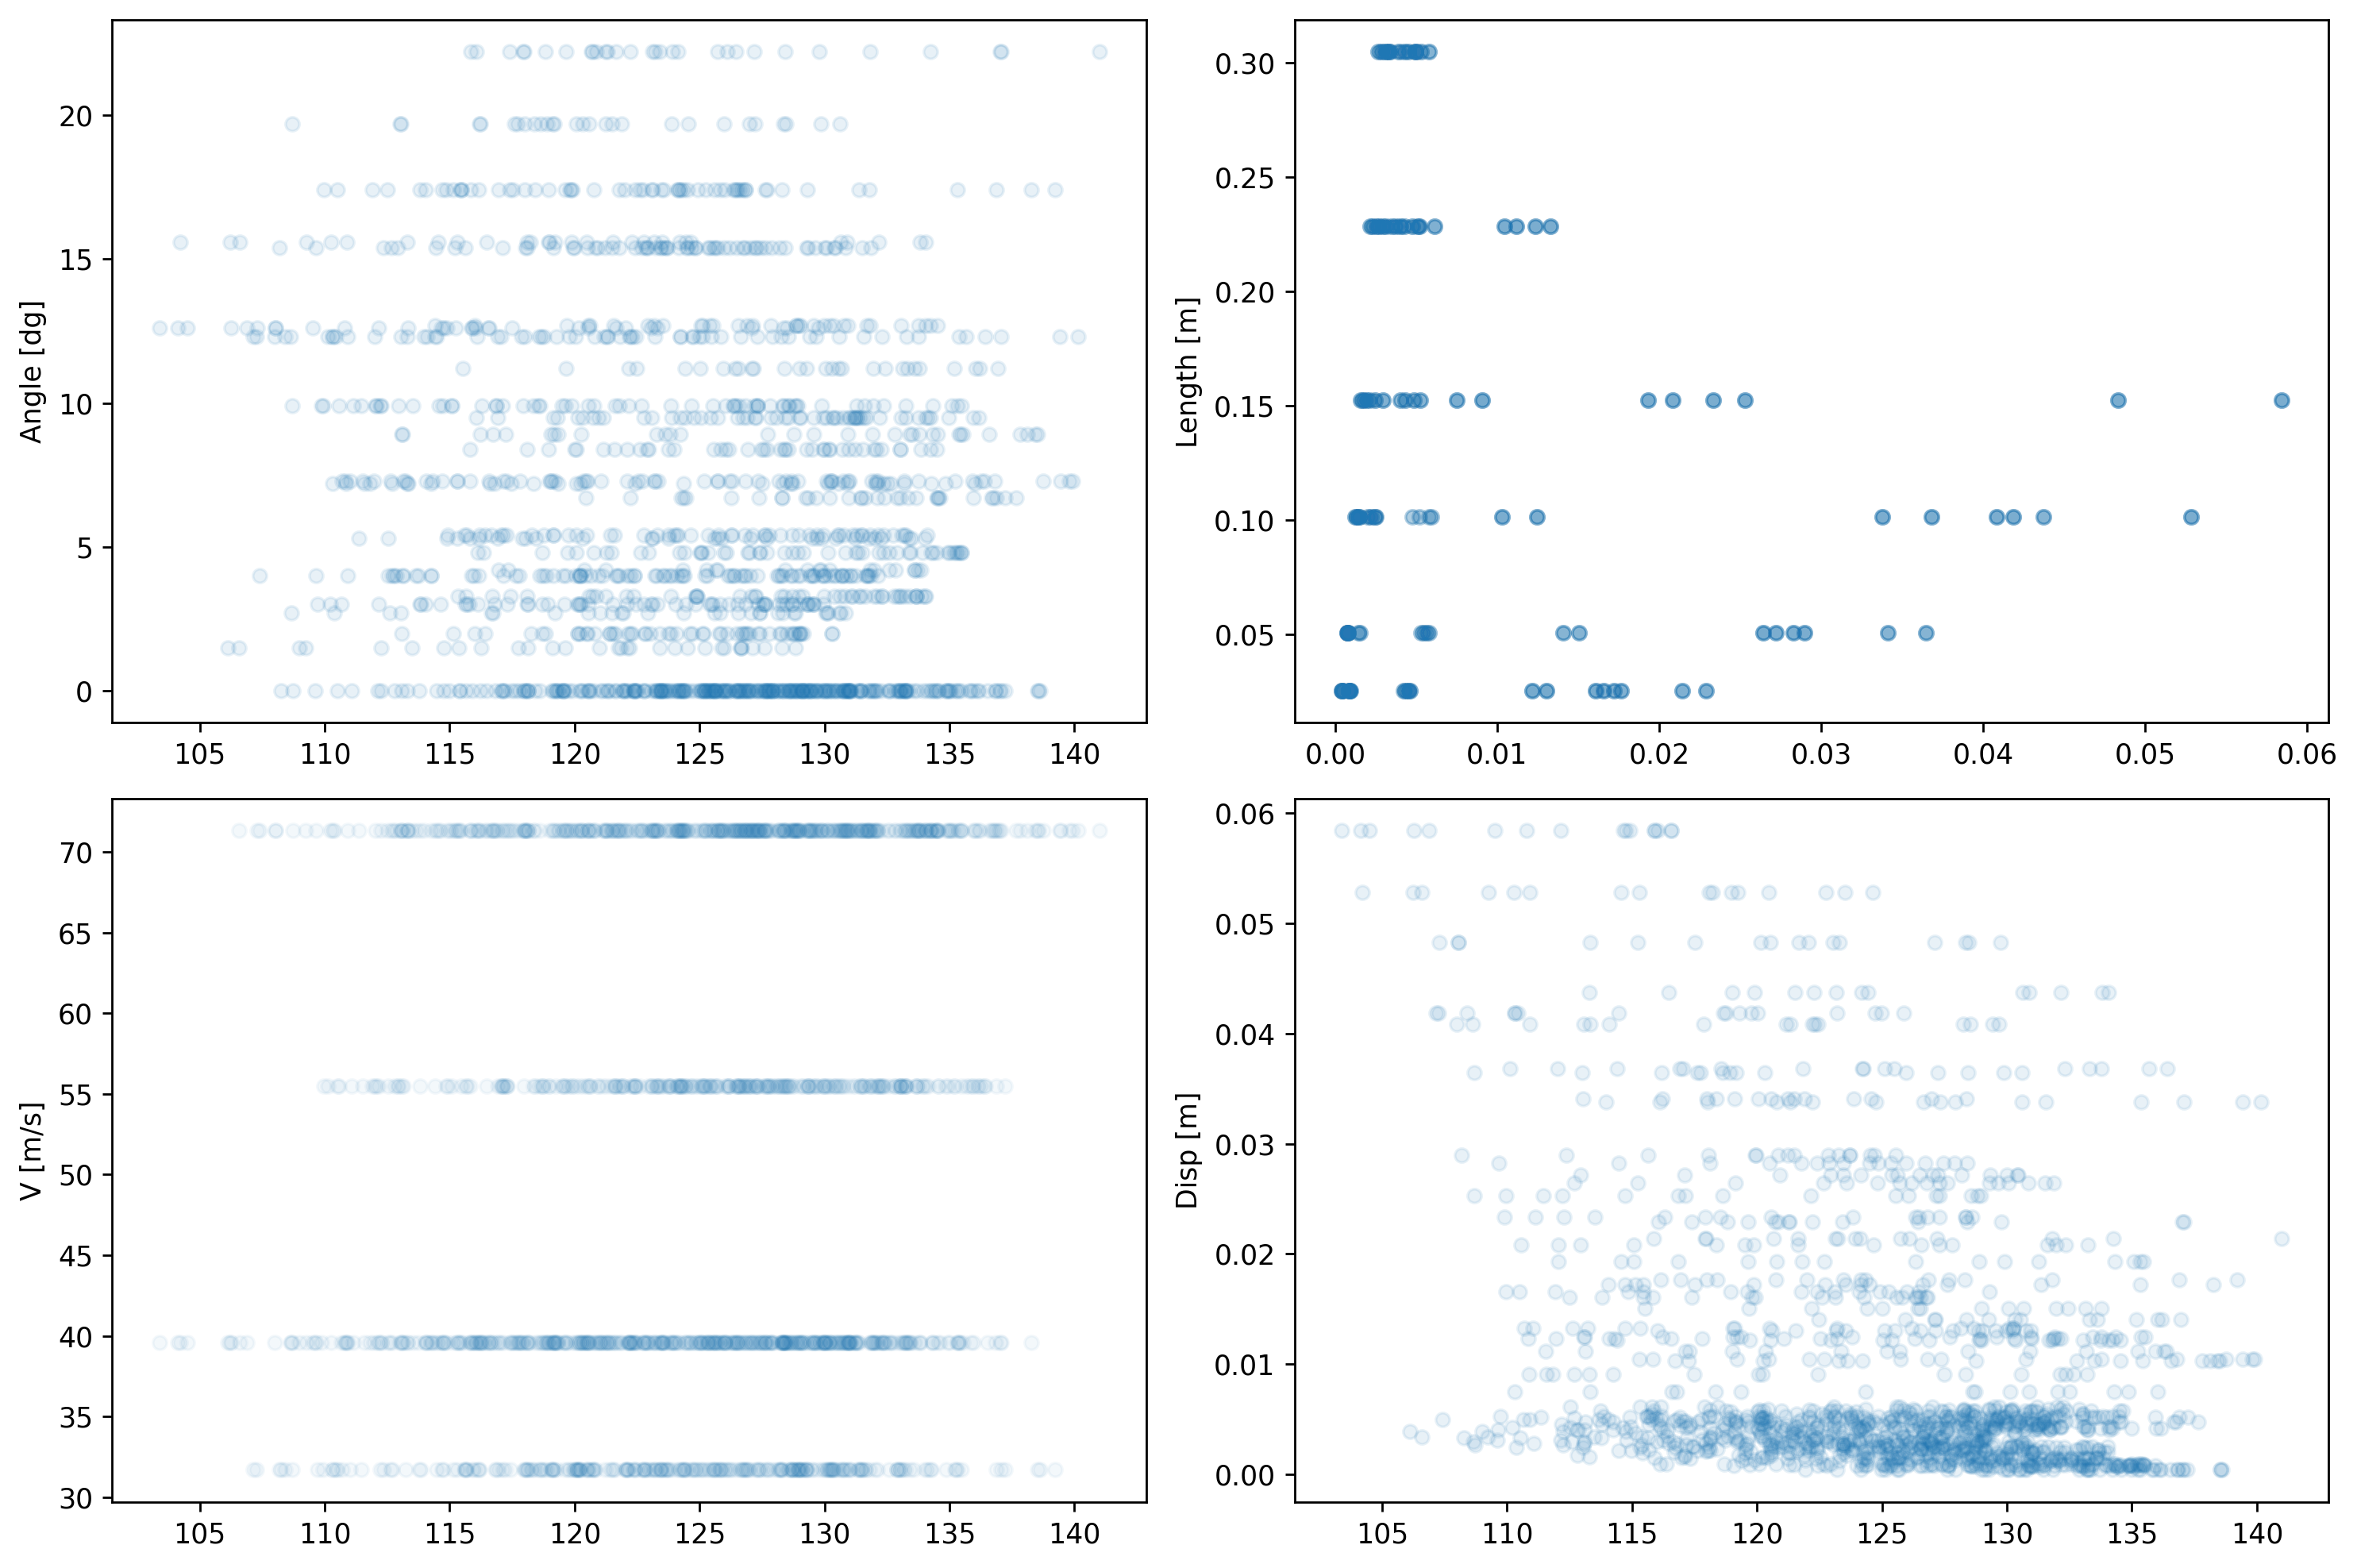

In [184]:
fig, ax = plt.subplots(2,2)

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

ax[0,0].scatter(pressure, angle, alpha = 0.1)
ax[0,0].set_ylabel("Angle [dg]")

ax[0,1].scatter(pressure, Clenght, alpha = 0.05)
ax[0,1].set_ylabel("Length [m]")

ax[1,0].scatter(pressure, velocity, alpha = 0.05)
ax[1,0].set_ylabel("V [m/s]")

ax[1,1].scatter(pressure, Displacement, alpha = 0.1)
ax[1,1].set_ylabel("Disp [m]")

fig.tight_layout()

In [154]:

# ax[0,1].plot(Clenght)
# ax[0,1].twinx().plot(pressure, alpha = 0.3, color = 'orange')
# ax[0,1].set_ylabel("Length [m]")

# ax[1,0].plot(velocity)
# ax[1,0].twinx().plot(pressure, alpha = 0.3, color = 'orange')
# ax[1,0].set_ylabel("V [m/s]")

# ax[1,1].plot(Displacement)
# ax[1,1].twinx().plot(pressure, alpha = 0.3, color = 'orange')
# ax[1,1].set_ylabel("Disp [m]")

# fig.tight_layout()

In [124]:
import math
#DFT (Discrete fourier transform) calculation using Euler's identity
def DFT(x):
    
    
    n = len(x)
    T = [[],[]]
    for k in range(n):
        re = 0
        im = 0
        for i in range(n):
            re += x[i]*(math.cos(2*math.pi*(k*i)/n))
            im += x[i]*(math.sin(2*math.pi*(k*i)/n))
        T[0].append(re)
        T[1].append(im)

    #Removing the first point because it is always strange
    T[0].pop(0)
    T[1].pop(0)
    
    return T



In [132]:
time_domain = DFT(df.iloc[:,0])



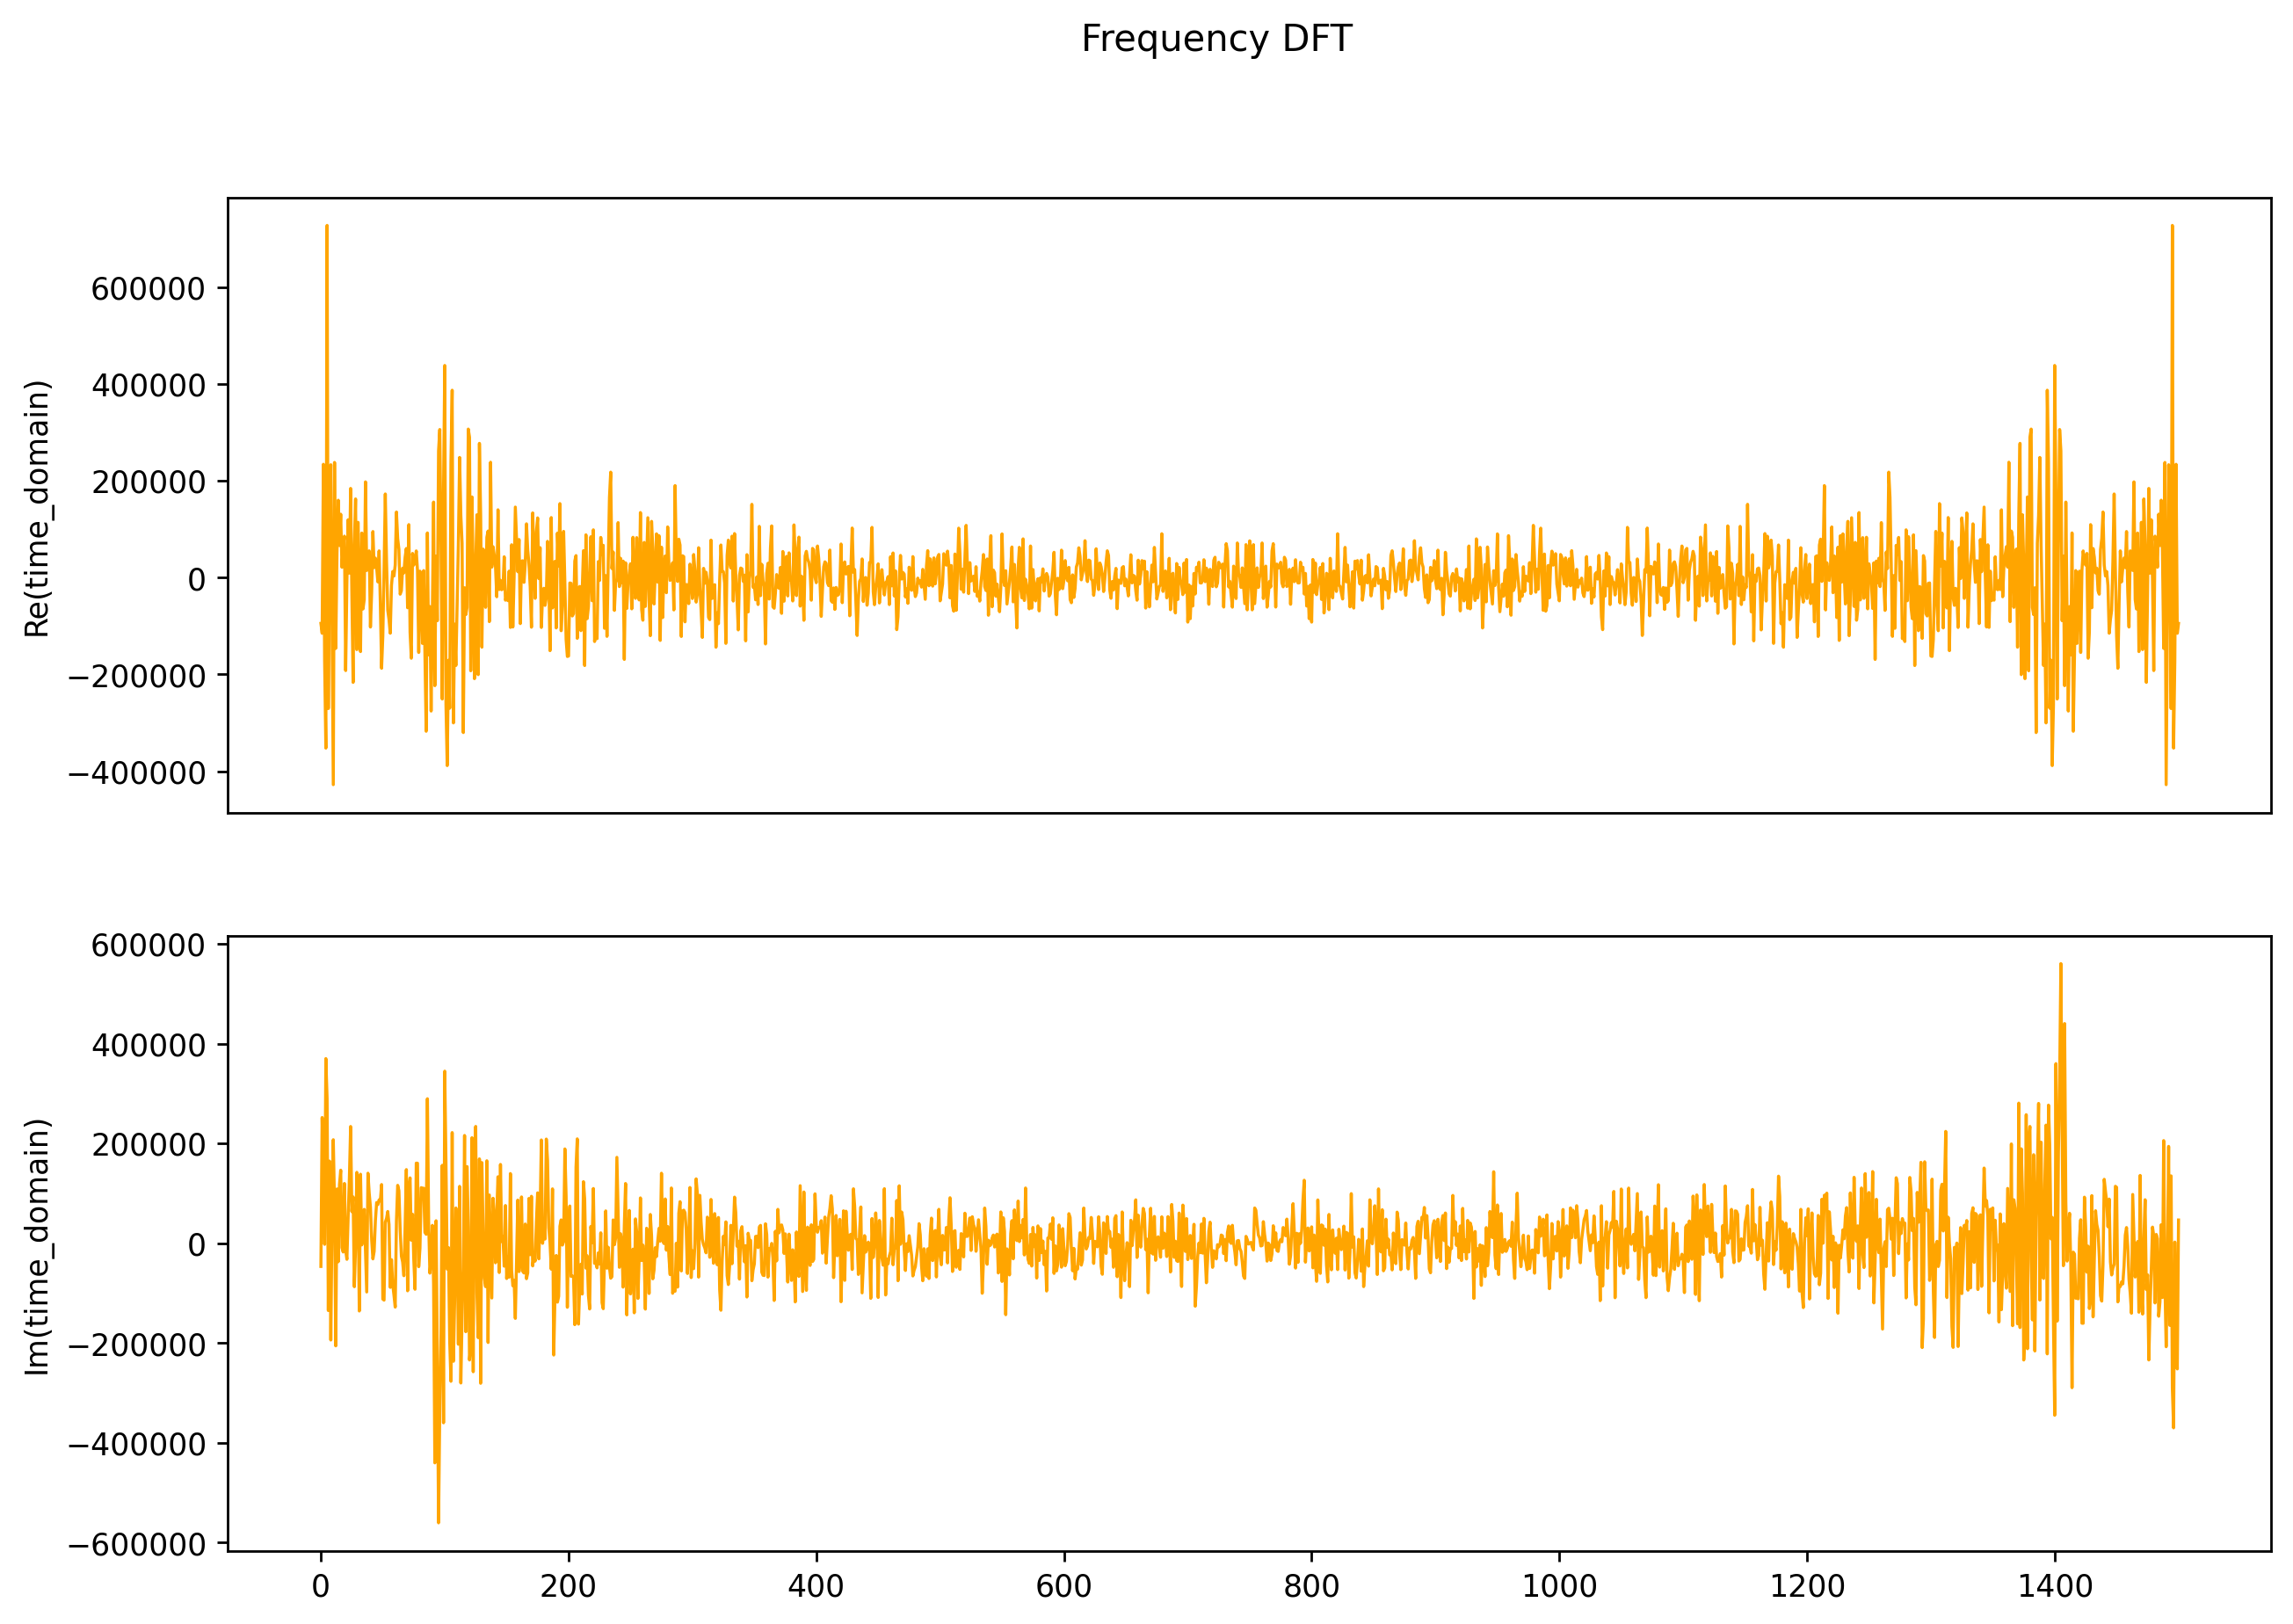

In [161]:

fig, ax = plt.subplots(2,1)
fig.suptitle("Frequency DFT")
n = len(time_domain[0])
ax[0].plot(range(n), time_domain[0], color = 'orange')
ax[0].set(ylabel = 'Re(time_domain)', xticks = [])
ax[1].plot(range(n), time_domain[1], color = 'orange')
ax[1].set(ylabel = 'Im(time_domain)')




plt.show()


In [136]:
pressure_DFT = DFT(df.iloc[:,5])

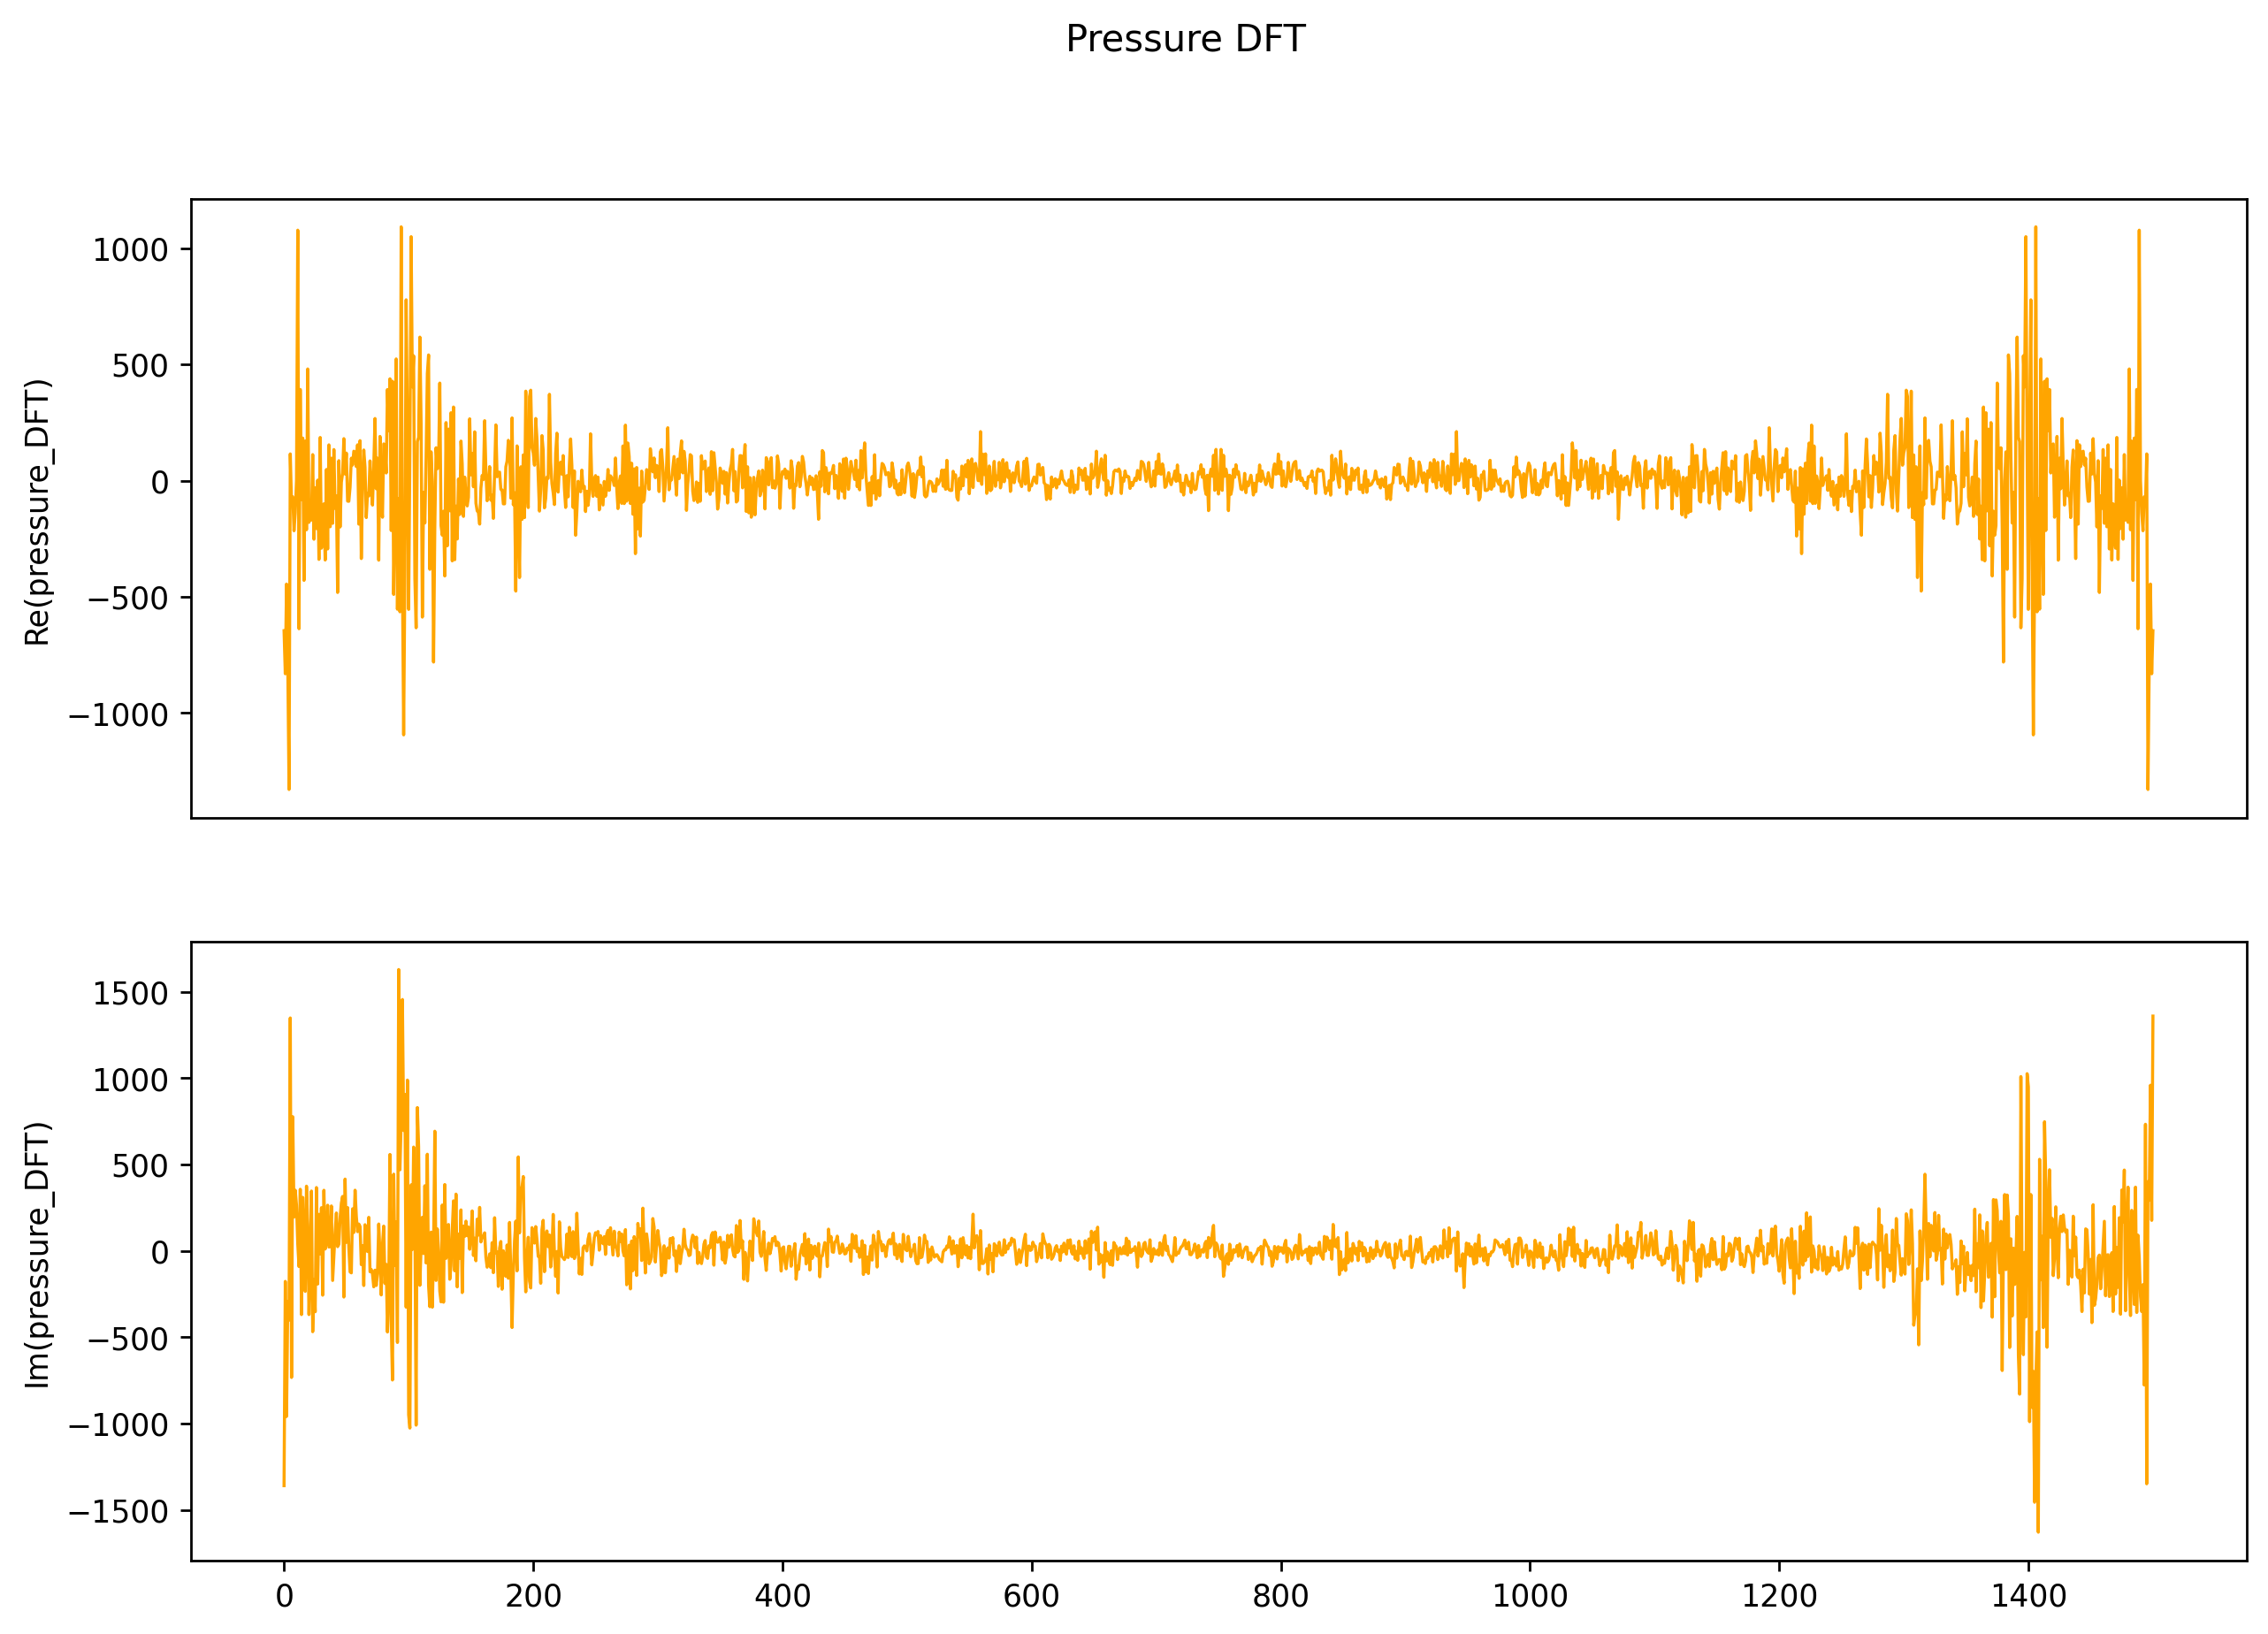

In [162]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Pressure DFT")
n = len(pressure_DFT[0])
ax[0].plot(range(n), pressure_DFT[0], color = 'orange')
ax[0].set(ylabel = 'Re(pressure_DFT)', xticks = [])
ax[1].plot(range(n), pressure_DFT[1], color = 'orange')
ax[1].set(ylabel = 'Im(pressure_DFT)')




plt.show()


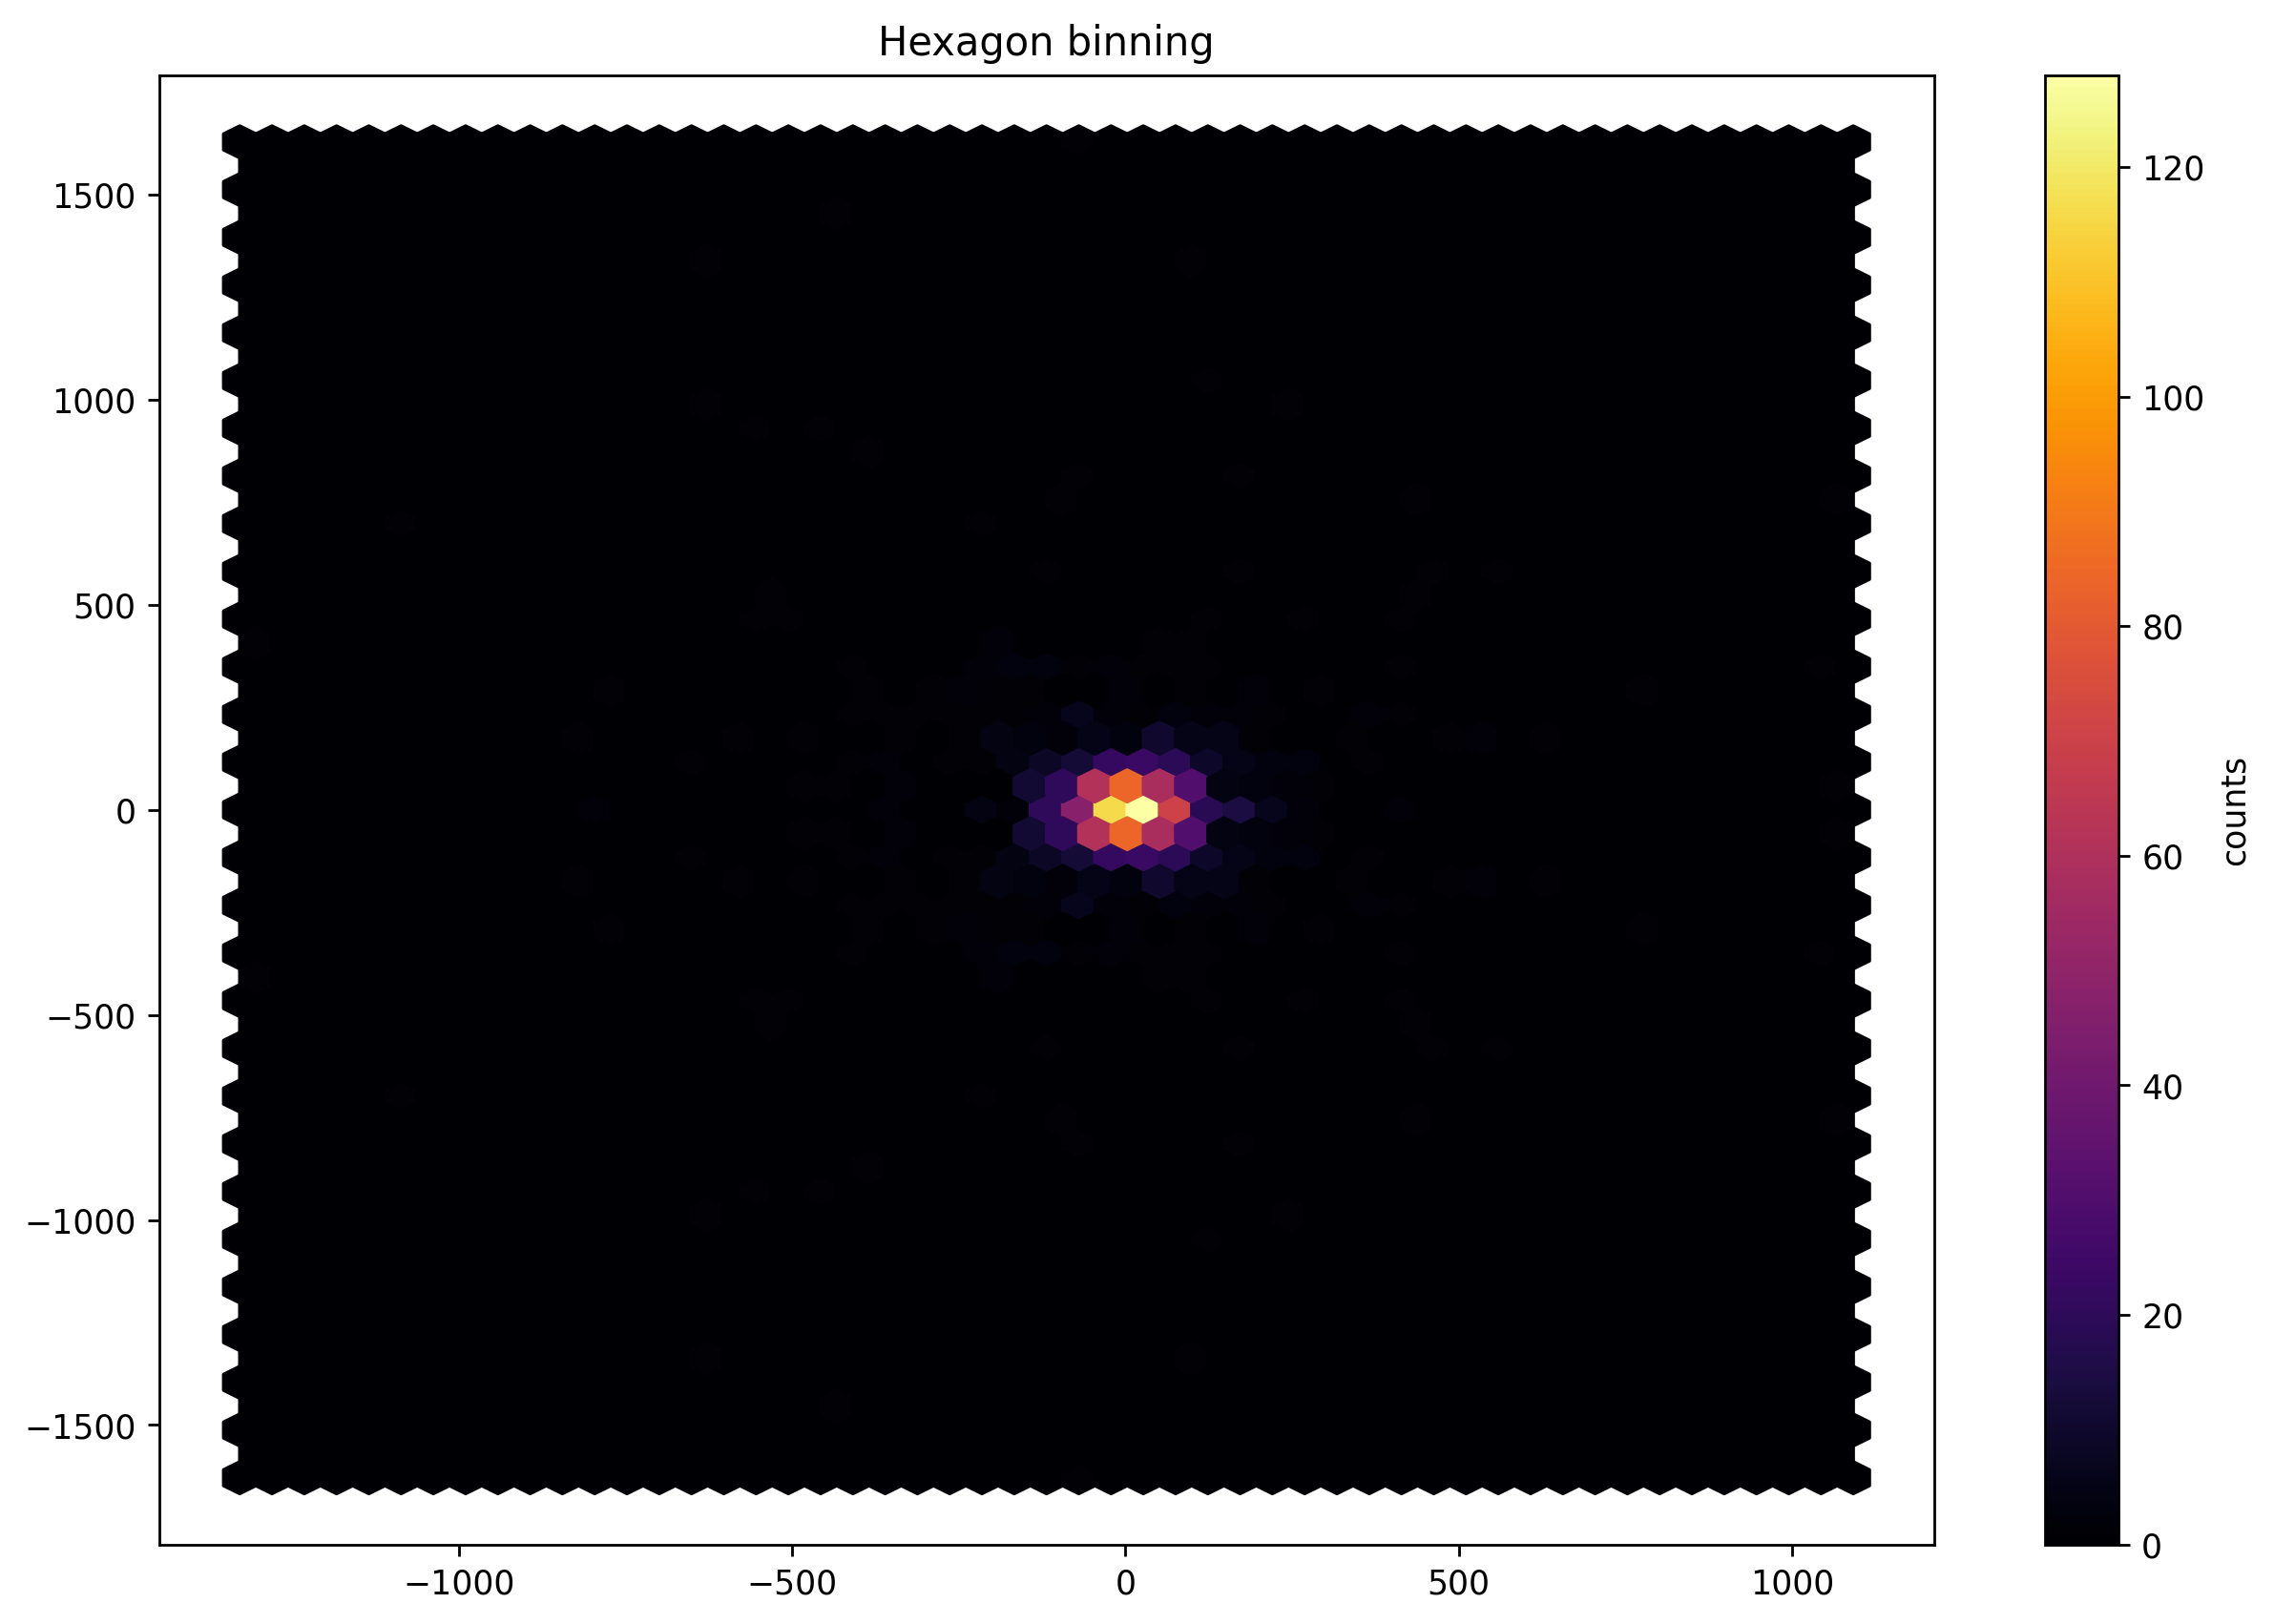

In [148]:
fig, ax = plt.subplots()
# ax.scatter(pressure_DFT[0], pressure_DFT[1], color = 'orange')

hb = ax.hexbin(pressure_DFT[0], pressure_DFT[1], gridsize=50, cmap='inferno')
# ax.set(xlim=xlim, ylim=ylim)
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax, label='counts')

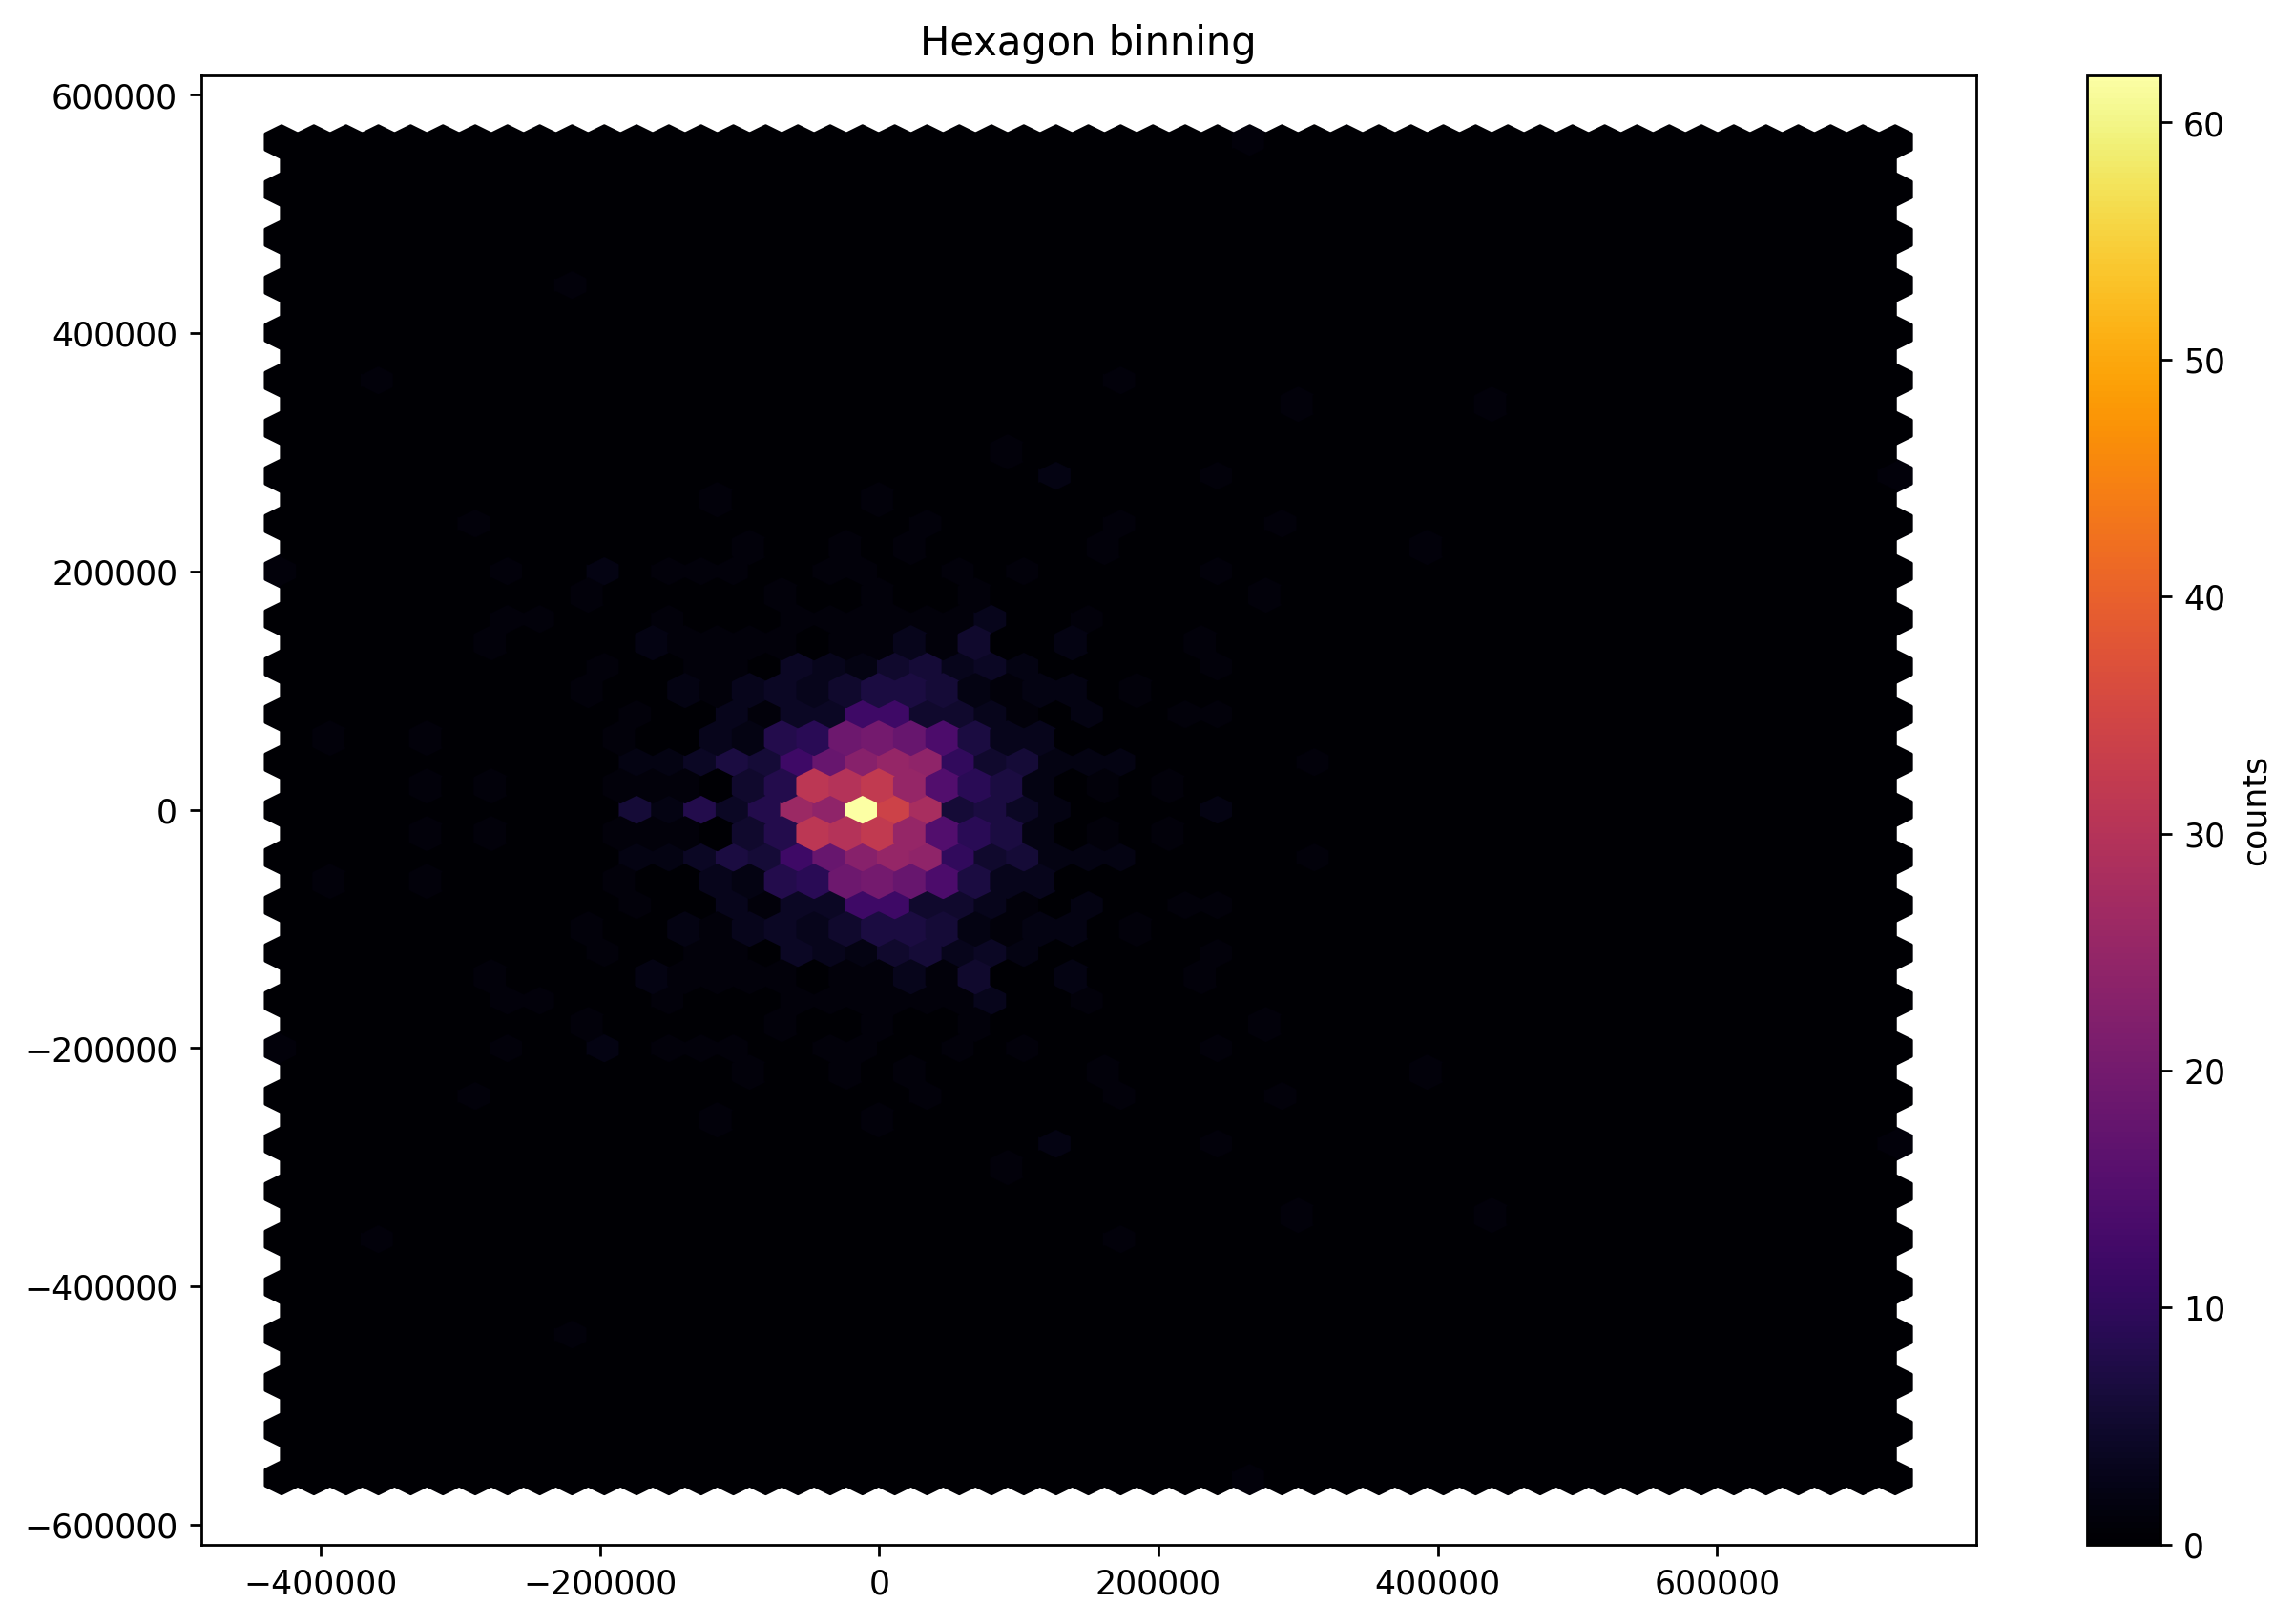

In [146]:
fig, ax = plt.subplots()
# ax.scatter(pressure_DFT[0], pressure_DFT[1], color = 'orange')

hb = ax.hexbin(time_domain[0], time_domain[1], gridsize=50, cmap='inferno')
# ax.set(xlim=xlim, ylim=ylim)
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax, label='counts')